In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['amazon_alexa.tsv']


In [2]:
data=pd.read_csv("../input/amazon_alexa.tsv",sep="\t")
data.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
data.groupby("rating").describe()

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [5]:
data_c=data
data=data[data.rating!=5]
data=data[data.rating!=4]
data.groupby("rating").describe()

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [45]:
data["index"]=range(0,409)
data=data.set_index("index")
data.head()

,rating,date,variation,verified_reviews,feedback
index,,,,,
0,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
1,3,30-Jul-18,Sandstone Fabric,"I got a second unit for the bedroom, I was exp...",1
2,3,30-Jul-18,Heather Gray Fabric,The speakers sound pretty good for being so sm...,1
3,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
4,3,30-Jul-18,Charcoal Fabric,No different than Apple. To play a specific li...,1


In [34]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [53]:
sw=set(stopwords.words("english"))
c=[]
for i in range(0,409):
    review=re.sub('[^a-zA-Z]',' ',data['verified_reviews'][i])
    review=review.lower()
    review=review.split()
    st=PorterStemmer()
    review=[st.stem(token) for token in review if not token in sw]
    review=' '.join(review)
    c.append(review)

['without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'got second unit bedroom expect sound improv didnt realli see differ overal big improv st gener',
 'speaker sound pretti good small setup pretti easi bought two reason rate follow instruct synch music unit know done correctli sync primari motiv purchas multipl unit',
 'like siri fact siri answer accur alexa see real need household though good bargain prime day deal',
 'differ appl play specif list music must amazon spotifi plu prime etc account must pay play music star reason everyth els',
 'like googl better',
 'sound terribl u want good music get bose',
 'much featur',
 'annoy everyth show alexa abl download spend much time tri figur phrase machin may well look',
 'know half thing ask recogn sprinkler wifi control even though product detail say compat program chang wifi thermostat set match w

In [54]:
word=[]
for i in range(0,len(c)):
    word+=(re.findall(r"\w+",c[i]))

['without',
 'cellphon',
 'cannot',
 'use',
 'mani',
 'featur',
 'ipad',
 'see',
 'use',
 'great',
 'alarm',
 'u',
 'r',
 'almost',
 'deaf',
 'hear',
 'alarm',
 'bedroom',
 'live',
 'room',
 'reason',
 'enough',
 'keep',
 'fun',
 'ask',
 'random',
 'question',
 'hear',
 'respons',
 'seem',
 'smartbon',
 'polit',
 'yet',
 'got',
 'second',
 'unit',
 'bedroom',
 'expect',
 'sound',
 'improv',
 'didnt',
 'realli',
 'see',
 'differ',
 'overal',
 'big',
 'improv',
 'st',
 'gener',
 'speaker',
 'sound',
 'pretti',
 'good',
 'small',
 'setup',
 'pretti',
 'easi',
 'bought',
 'two',
 'reason',
 'rate',
 'follow',
 'instruct',
 'synch',
 'music',
 'unit',
 'know',
 'done',
 'correctli',
 'sync',
 'primari',
 'motiv',
 'purchas',
 'multipl',
 'unit',
 'like',
 'siri',
 'fact',
 'siri',
 'answer',
 'accur',
 'alexa',
 'see',
 'real',
 'need',
 'household',
 'though',
 'good',
 'bargain',
 'prime',
 'day',
 'deal',
 'differ',
 'appl',
 'play',
 'specif',
 'list',
 'music',
 'must',
 'amazon',
 'sp

In [66]:
from collections import Counter
word_count=Counter(word)
word_count=sorted(word_count.items(),key=lambda x:x[1],reverse=True)

In [69]:
word_list=[]
count=[]
for x,y in word_count:
    word_list.append(x)
    count.append(y)

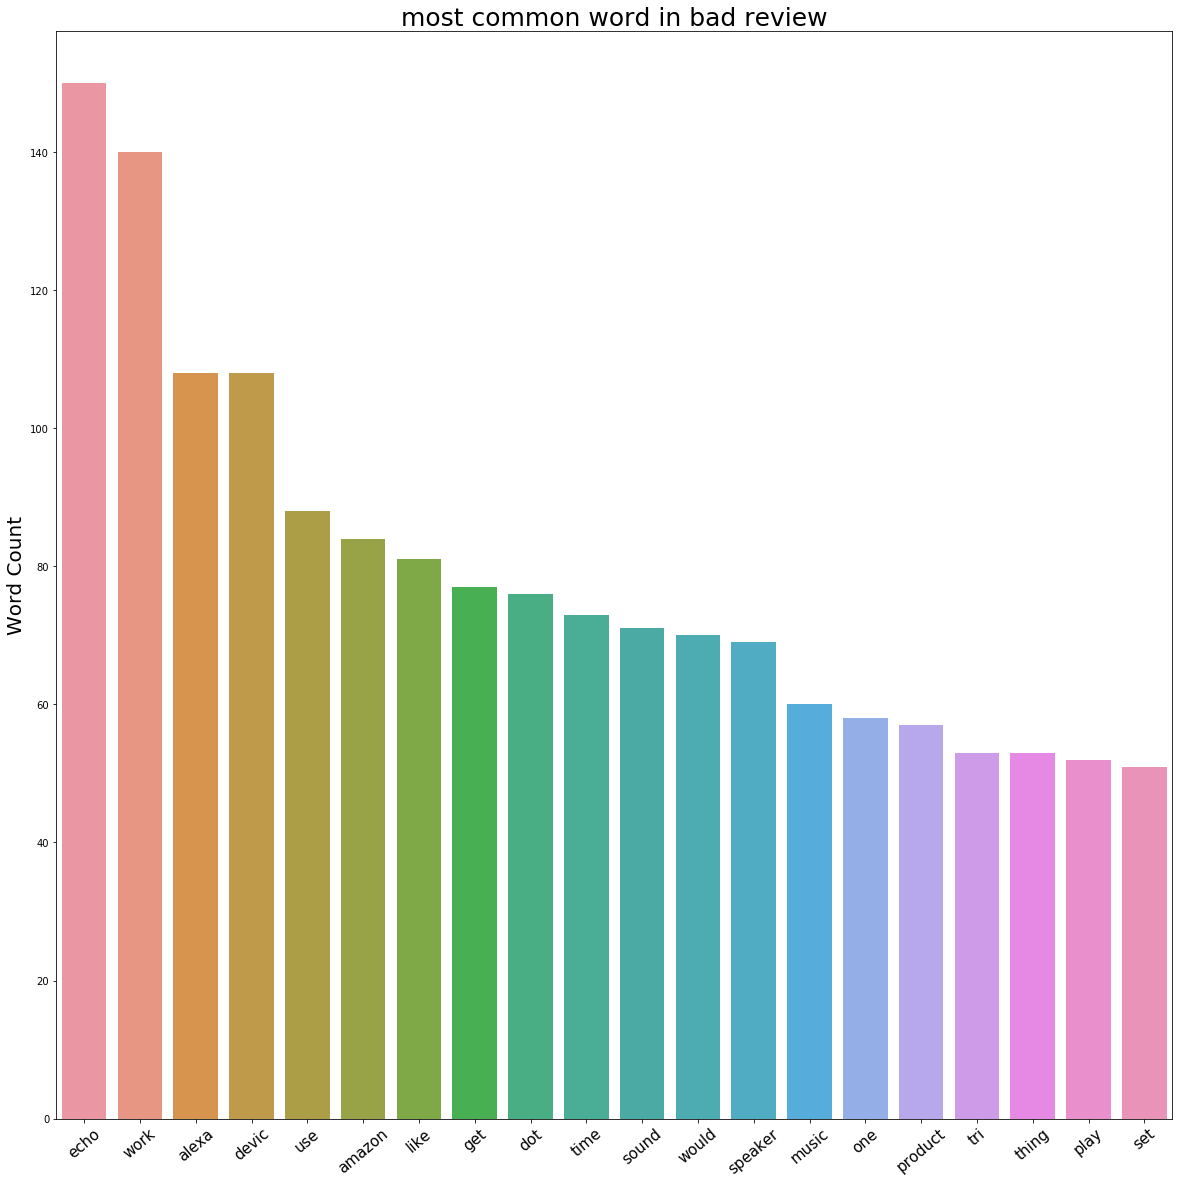

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
plot=sns.barplot(np.arange(20),count[:20])
plt.ylabel("Word Count",fontsize=20)
plt.xticks(np.arange(20),word_list[:20],fontsize=15,rotation=40)
plt.title("Most common word in bad review",fontsize=25)
plt.show()

In [93]:
data=data_c
data=data[data.rating!=3]
data=data[data.rating!=2]
data=data[data.rating!=1]
data.rating.value_counts()

5    2286
4     455
Name: rating, dtype: int64

In [96]:
data["index"]=range(0,2741)
data=data.set_index("index")
data.head(5)

,rating,date,variation,verified_reviews,feedback
index,,,,,
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [100]:
c1=[]
for i in range(0,2741):
    review=re.sub("[^a-zA-Z]"," ",data["verified_reviews"][i])
    review=review.lower()
    review=review.split()
    st=PorterStemmer()
    review=[st.stem(token) for token in review if token not in sw]
    review=" ".join(review)
    c1.append(review)

['love echo',
 'love',
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home',
 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well',
 'music',
 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els',
 'think th one purchas work get one everi room hous realli like featur offer specifili play music echo control light throughout hous',
 'look great',
 'love listen song heard sinc childhood get news weather inform great',
 'sent year old dad talk constantli',
 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time',
 'purchas mother knee problem give someth tri come get around fast like enjoy littl big thing alexa play song time cook',
 'love love love',
 'expect',
 'love wife hate',
 'realli happi purchas great speaker easi set',
 'use alexa coupl day lot fun new toy like new household member tri lear

In [101]:
word=[]
for i in range(0,len(c1)):
    word+=(re.findall("\w+",c1[i]))

['love',
 'echo',
 'love',
 'sometim',
 'play',
 'game',
 'answer',
 'question',
 'correctli',
 'alexa',
 'say',
 'got',
 'wrong',
 'answer',
 'like',
 'abl',
 'turn',
 'light',
 'away',
 'home',
 'lot',
 'fun',
 'thing',
 'yr',
 'old',
 'learn',
 'dinosaur',
 'control',
 'light',
 'play',
 'game',
 'like',
 'categori',
 'nice',
 'sound',
 'play',
 'music',
 'well',
 'music',
 'receiv',
 'echo',
 'gift',
 'need',
 'anoth',
 'bluetooth',
 'someth',
 'play',
 'music',
 'easili',
 'access',
 'found',
 'smart',
 'speaker',
 'wait',
 'see',
 'els',
 'think',
 'th',
 'one',
 'purchas',
 'work',
 'get',
 'one',
 'everi',
 'room',
 'hous',
 'realli',
 'like',
 'featur',
 'offer',
 'specifili',
 'play',
 'music',
 'echo',
 'control',
 'light',
 'throughout',
 'hous',
 'look',
 'great',
 'love',
 'listen',
 'song',
 'heard',
 'sinc',
 'childhood',
 'get',
 'news',
 'weather',
 'inform',
 'great',
 'sent',
 'year',
 'old',
 'dad',
 'talk',
 'constantli',
 'love',
 'learn',
 'knew',
 'thing',
 'ev

In [104]:
w_c=Counter(word)
w_c=sorted(w_c.items(),key=lambda x :x[1],reverse=True)
word=[]
count=[]
for x,y in w_c:
    word.append(x)
    count.append(y)

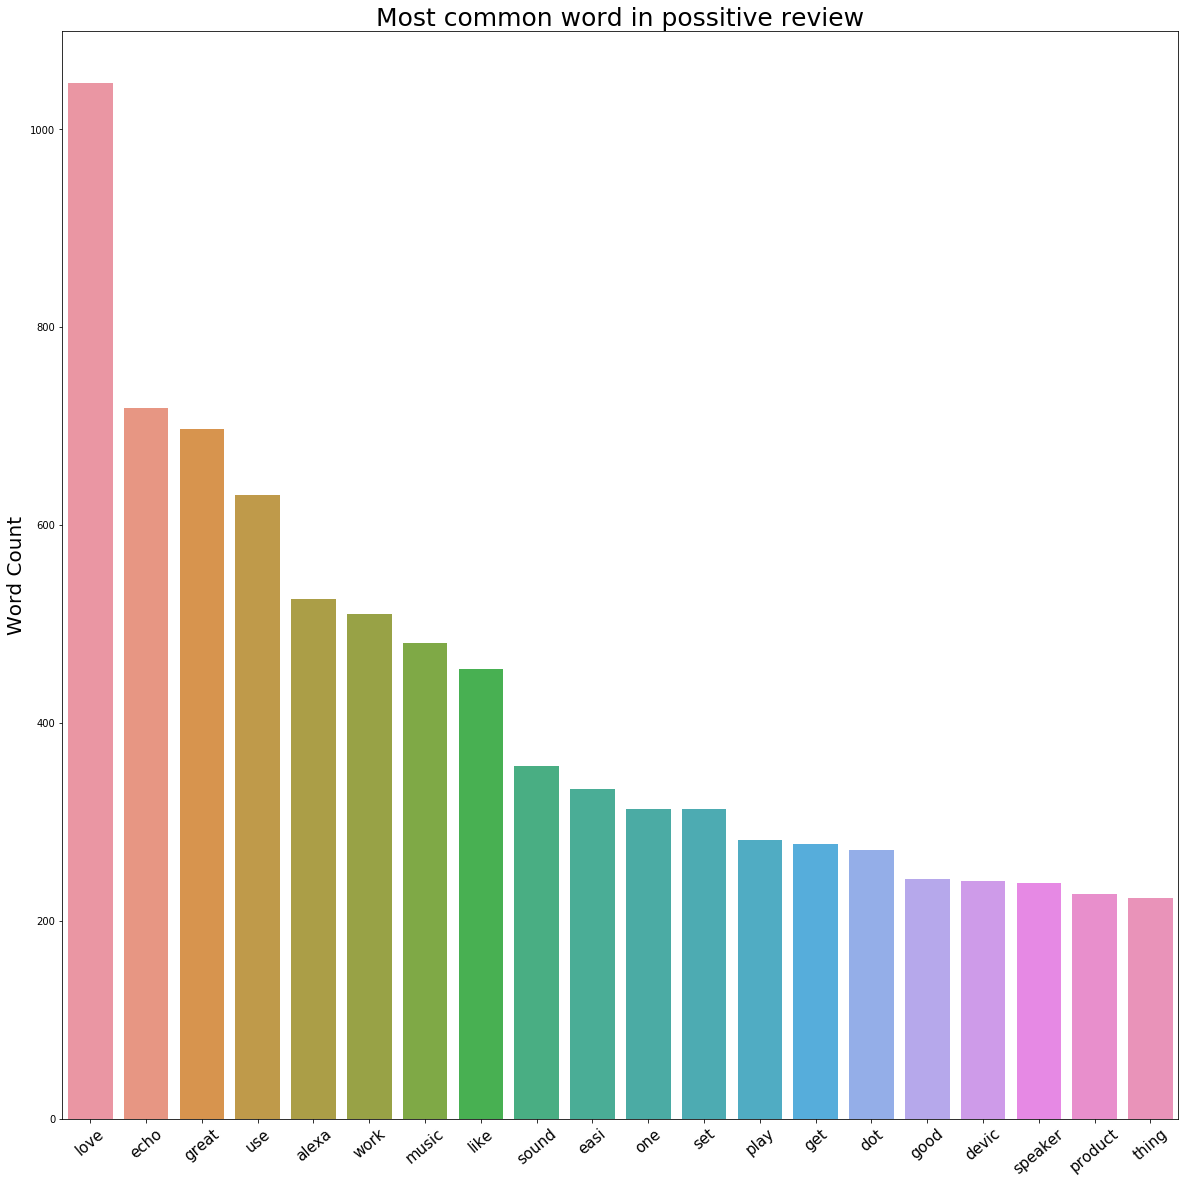

In [107]:
plt.figure(figsize=(20,20))
plot=sns.barplot(np.arange(20),count[:20])
plt.ylabel("Word Count",fontsize=20)
plt.xticks(np.arange(20),word[:20],fontsize=15,rotation=40)
plt.title("Most common word in possitive review",fontsize=25)
plt.show()